<a href="https://www.kaggle.com/code/alestamm/bellabeat-case-study?scriptVersionId=98719151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<font size="5">**Bellabeat Case Study - How Can a Wellness Tech Company Play It Smart?**</font>    
A case study with Python and Tableau

## Scenario



<font size="4">Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company</font>

### Business Task

<font size="4">Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices, providing high-level recommendations for how these trends can inform Bellabeat marketing strategy.</font>

## Data Source: 

[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.

### Data Processing

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Get filesnames to import
files_names = os.listdir('../input/bellabeat')

files_names

['weightLogInfo_merged.csv',
 'sleepDay_merged.csv',
 'activity_sleep_weight.csv',
 'dailyIntensities_merged.csv',
 'dailyCalories_merged.csv',
 'dailySteps_merged.csv',
 'dailyActivity_merged.csv',
 'activity_weight_merged.csv']

In [3]:
#Import csvs into dataframes
df = [pd.read_csv(f'../input/bellabeat/{file_name}') for file_name in files_names]

In [4]:
#Inspect first dataframe
df[1].head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
#Group sleep information by Id
df_sleep = df[1].groupby(['Id']).agg({'TotalSleepRecords': [('N_Records','sum')], 
                                      'TotalMinutesAsleep':[('AverageTimeAsleep', 'mean')], 
                                      'TotalTimeInBed': [('AverageTimeInBed','mean')]})
df_sleep.columns = df_sleep.columns.droplevel()
df_sleep.reset_index(inplace=True)
df_sleep.head()

,Id,N_Records,AverageTimeAsleep,AverageTimeInBed
0,1503960366,27,360.280000,383.200000
1,1644430081,4,294.000000,346.000000
2,1844505072,3,652.000000,961.000000
3,1927972279,8,417.000000,437.800000
4,2026352035,28,506.178571,537.642857


In [6]:
#Transform minutes columns in hours
df_sleep = df_sleep.apply(lambda x: round(x/60, 0) if x.name in ['AverageTimeAsleep', 'AverageTimeInBed'] else x)
df_sleep.head()

,Id,N_Records,AverageTimeAsleep,AverageTimeInBed
0,1503960366,27,6.0,6.0
1,1644430081,4,5.0,6.0
2,1844505072,3,11.0,16.0
3,1927972279,8,7.0,7.0
4,2026352035,28,8.0,9.0


In [7]:
#Add difference between time asleep and time in bed
df_sleep['TimeInBedNotAsleep'] = df_sleep['AverageTimeInBed'] - df_sleep['AverageTimeAsleep']
df_sleep.head()

,Id,N_Records,AverageTimeAsleep,AverageTimeInBed,TimeInBedNotAsleep
0,1503960366,27,6.0,6.0,0.0
1,1644430081,4,5.0,6.0,1.0
2,1844505072,3,11.0,16.0,5.0
3,1927972279,8,7.0,7.0,0.0
4,2026352035,28,8.0,9.0,1.0


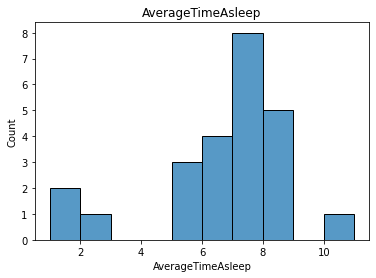

In [8]:
#Plot Average Time Asleep count
plt.title('AverageTimeAsleep')
sns.histplot(df_sleep['AverageTimeAsleep']);

<font size="4">Here we notice some outliers in average sleep time, that could probably be due to wrong measures (1-2 hours of sleep per day don't seen reasonable)</font>

In [9]:
#Get the mean of time users spend in bed while not sleeping
mean_sleep = (df_sleep['TimeInBedNotAsleep'].mean() * 60)
print(f'Users spent on average {mean_sleep} minutes in bed not sleeping')

Users spent on average 42.5 minutes in bed not sleeping


<font size="4">Users spent on average 42.5 minutes in bed not sleeping</font>

In [10]:
#Check daily activity df
df[6].describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


<font size="4">**From this summary we notice that users were averaging 2300 calories, 7637 steps and 5.49 km per day.**</font>

**We can see that daily activty data contains merged data from:**      
'dailySteps_merged.csv',   
'dailyIntensities_merged.csv',   
'dailyCalories_merged.csv'

In [11]:
# Count number of zeros in all columns of Dataframe
for column_name in df[6].columns:
    column = df[6][column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Id  is :  0
Count of zeros in column  ActivityDate  is :  0
Count of zeros in column  TotalSteps  is :  77
Count of zeros in column  TotalDistance  is :  78
Count of zeros in column  TrackerDistance  is :  78
Count of zeros in column  LoggedActivitiesDistance  is :  908
Count of zeros in column  VeryActiveDistance  is :  413
Count of zeros in column  ModeratelyActiveDistance  is :  386
Count of zeros in column  LightActiveDistance  is :  85
Count of zeros in column  SedentaryActiveDistance  is :  858
Count of zeros in column  VeryActiveMinutes  is :  409
Count of zeros in column  FairlyActiveMinutes  is :  384
Count of zeros in column  LightlyActiveMinutes  is :  84
Count of zeros in column  SedentaryMinutes  is :  1
Count of zeros in column  Calories  is :  4


In [12]:
#Drop columns that will not be useful
df[6].drop(['TrackerDistance', 'SedentaryActiveDistance', 'LoggedActivitiesDistance'], axis=1, inplace=True)

In [13]:
# Group daily activity by user id
daily_activity = df[6].groupby(['Id']).mean()
daily_activity.head(3)

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,
1503960366,12116.741935,7.809677,2.858387,0.794194,4.152903,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,0.939355,0.360645,2.606774,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,0.730000,0.951000,3.609000,9.566667,21.366667,178.466667,1161.866667,2811.300000


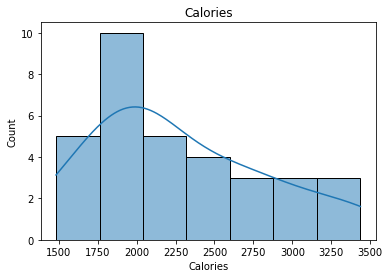

In [14]:
#Plot Average Calories burned
plt.title('Calories')
sns.histplot(daily_activity['Calories'], kde=True);

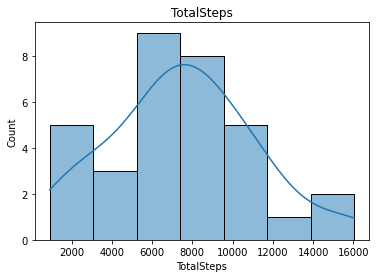

In [15]:
#Plot average Daily Steps
plt.title('TotalSteps')
sns.histplot(daily_activity['TotalSteps'], kde=True);

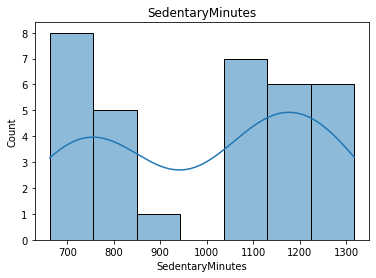

In [16]:
#Plot average SedentaryMinutes
plt.title('SedentaryMinutes')
sns.histplot(daily_activity['SedentaryMinutes'], kde=True);

In [17]:
#Add day of the week column for further analysis
df[6]['Weekday'] = pd.to_datetime(df[6]['ActivityDate']).apply(lambda x: x.day_name())
df[6].head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,Tuesday
1,1503960366,4/13/2016,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,Wednesday
2,1503960366,4/14/2016,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776,Thursday


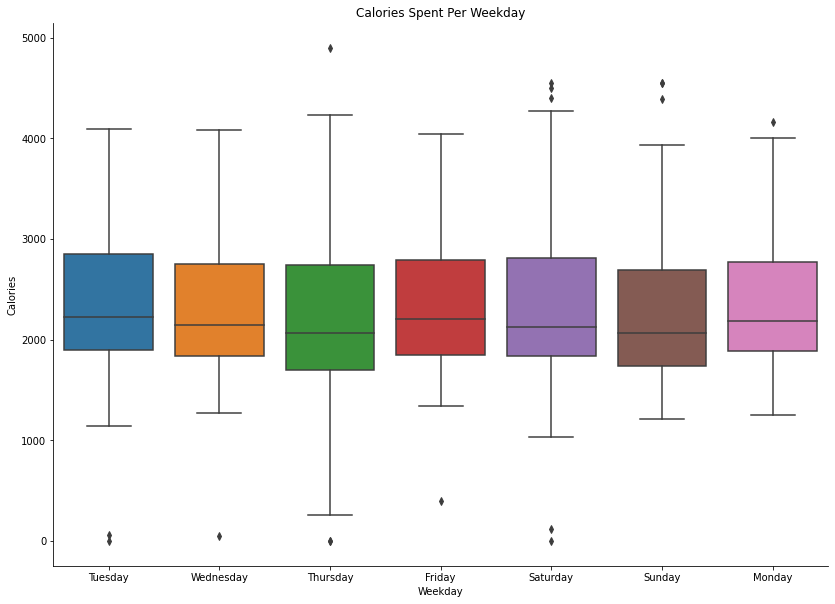

In [18]:
# Plot Calories burned per weekday
sns.catplot(x='Weekday', y='Calories', 
            data=df[6], kind="box",  height=8.27, aspect=11.7/8.27
            ).set(title='Calories Spent Per Weekday');

In [19]:
#Convert 'Sleepday' column to remove hour stamp and prepare name to merge
df[1]['ActivityDate'] = pd.to_datetime(df[1]['SleepDay']).dt.date

In [20]:
#Convert ActivityDate to date
df[6]['ActivityDate'] = pd.to_datetime(df[6]['ActivityDate']).dt.date

In [21]:
#Merge sleep and activity dfs
activity_sleep_merged = pd.merge(df[6], df[1], left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDate'], how='left')
activity_sleep_merged

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.500000,1.88,0.55,6.06,25,13,328,728,1985,Tuesday,4/12/2016 12:00:00 AM,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.970000,1.57,0.69,4.71,21,19,217,776,1797,Wednesday,4/13/2016 12:00:00 AM,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.740000,2.44,0.40,3.91,30,11,181,1218,1776,Thursday,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,2.14,1.26,2.83,29,34,209,726,1745,Friday,4/15/2016 12:00:00 AM,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.160000,2.71,0.41,5.04,36,10,221,773,1863,Saturday,4/16/2016 12:00:00 AM,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,1.08,0.20,6.80,17,4,245,1174,2847,Sunday,NaN,NaN,NaN,NaN
939,8877689391,2016-05-09,20226,18.250000,11.10,0.80,6.24,73,19,217,1131,3710,Monday,NaN,NaN,NaN,NaN
940,8877689391,2016-05-10,10733,8.150000,1.35,0.46,6.28,18,11,224,1187,2832,Tuesday,NaN,NaN,NaN,NaN
941,8877689391,2016-05-11,21420,19.559999,13.22,0.41,5.89,88,12,213,1127,3832,Wednesday,NaN,NaN,NaN,NaN


In [22]:
#Drop unwanted columns for this analysis
activity_sleep_merged.drop(['VeryActiveDistance','ModeratelyActiveDistance',
                            'LightActiveDistance','VeryActiveMinutes',
                            'FairlyActiveMinutes','LightlyActiveMinutes', 
                            'TotalSleepRecords','SleepDay'], axis=1, inplace=True)

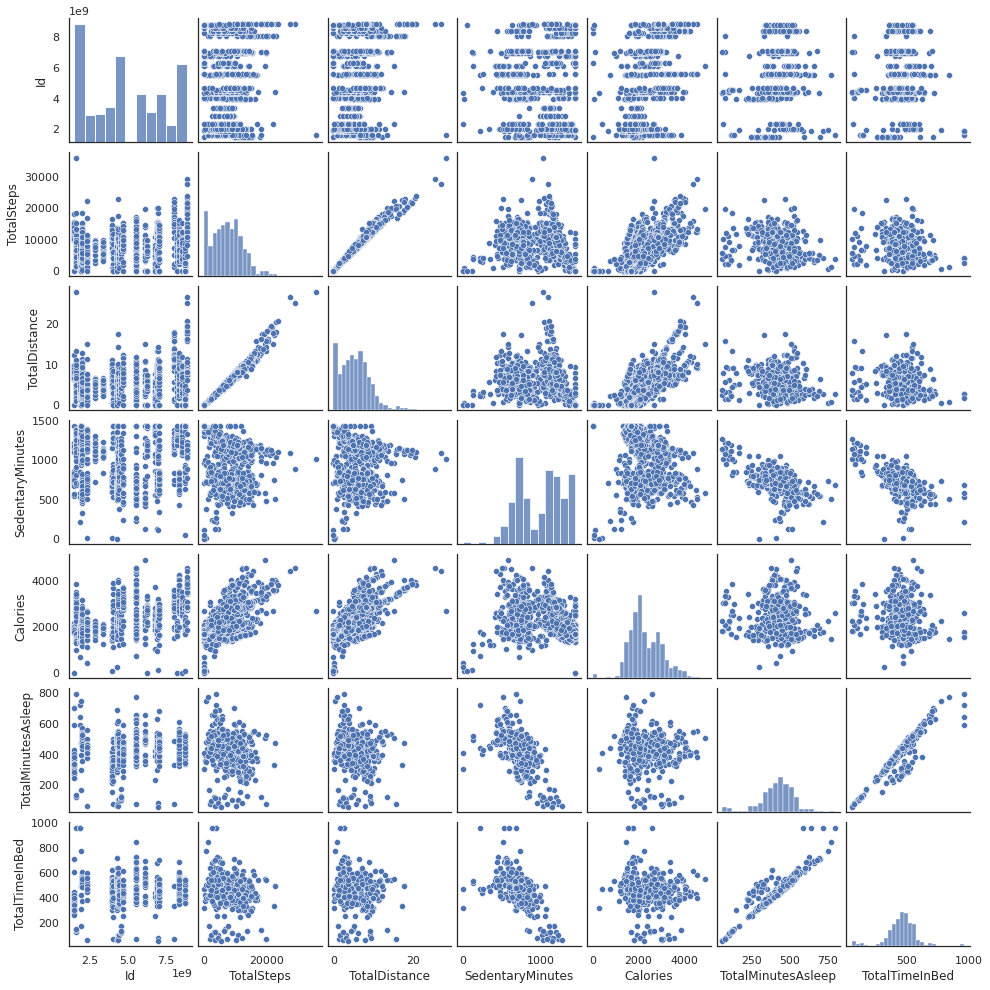

In [23]:
#Check for possible correlations in the data
sns.set(style='white')
sns.pairplot(activity_sleep_merged, height=2)
plt.show()

In [24]:
#Check for possible correlations in the data
activity_sleep_merged.corr()

,Id,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
Id,1.000000,0.186511,0.241727,-0.044573,0.397471,0.080117,0.002112
TotalSteps,0.186511,1.000000,0.985368,-0.329527,0.592949,-0.186866,-0.164060
TotalDistance,0.241727,0.985368,1.000000,-0.290652,0.646602,-0.172143,-0.158095
SedentaryMinutes,-0.044573,-0.329527,-0.290652,1.000000,-0.111786,-0.599394,-0.618713
Calories,0.397471,0.592949,0.646602,-0.111786,1.000000,-0.028526,-0.132507
TotalMinutesAsleep,0.080117,-0.186866,-0.172143,-0.599394,-0.028526,1.000000,0.930457
TotalTimeInBed,0.002112,-0.164060,-0.158095,-0.618713,-0.132507,0.930457,1.000000


<font size="4">We can notice that are no important correlations between the data.   
There's a small negative correlation between SedentaryMinutes and TotalMinutesAsleep, which could mean that people sacrifice sleep due to sedentary activies, or that people that spend more time in sedentary activies tend to sleep less. We would need more data to make a more detailed analysis.</font>

In [25]:
#Check weight df
df[0].head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [26]:
#Convert 'Date' column to remove hour stamp and prepare name to merge
df[0]['ActivityDate'] = pd.to_datetime(df[7]['Date']).dt.date

In [27]:
#Create weight df with only useful data
weight_df = df[0].drop(['WeightPounds', 'IsManualReport', 'LogId'], axis=1)

In [28]:
#Merge weight info with activity df
activity_weight_merged = pd.merge(activity_sleep_merged , weight_df, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDate'], how='left')
activity_weight_merged.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,Calories,Weekday,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,Fat,BMI
0,1503960366,2016-04-12,13162,8.50,728,1985,Tuesday,327.0,346.0,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,776,1797,Wednesday,384.0,407.0,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,1218,1776,Thursday,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Check for possible correlations in the data
activity_weight_merged.corr()

,Id,TotalSteps,TotalDistance,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg,Fat,BMI
Id,1.000000,0.186511,0.241727,-0.044573,0.397471,0.080117,0.002112,NaN,NaN,NaN
TotalSteps,0.186511,1.000000,0.985368,-0.329527,0.592949,-0.186866,-0.164060,-1.0,NaN,-1.0
TotalDistance,0.241727,0.985368,1.000000,-0.290652,0.646602,-0.172143,-0.158095,-1.0,NaN,-1.0
SedentaryMinutes,-0.044573,-0.329527,-0.290652,1.000000,-0.111786,-0.599394,-0.618713,-1.0,NaN,-1.0
Calories,0.397471,0.592949,0.646602,-0.111786,1.000000,-0.028526,-0.132507,-1.0,NaN,-1.0
TotalMinutesAsleep,0.080117,-0.186866,-0.172143,-0.599394,-0.028526,1.000000,0.930457,-1.0,NaN,-1.0
TotalTimeInBed,0.002112,-0.164060,-0.158095,-0.618713,-0.132507,0.930457,1.000000,-1.0,NaN,-1.0
WeightKg,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,NaN,1.0
Fat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,NaN,1.0


<font size="4">We can see that are no important correlations in the data besides obvious ones (TotalMinutesAsleep x TotalTimeInBed and TotalSteps x TotalDistance).   
There's a small correlation between Weight and Calories burned during exercises but that is to be expected.</font>

In [30]:
#Create df with full columns for export
activity_sleep_weight = pd.merge(df[6], df[1], left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDate'], how='left')

In [31]:
#Export activity_sleep_weight  to csv to create more DataViz in Tableau
activity_sleep_weight.to_csv('activity_sleep_weight.csv')

## Data visualization & Analysis


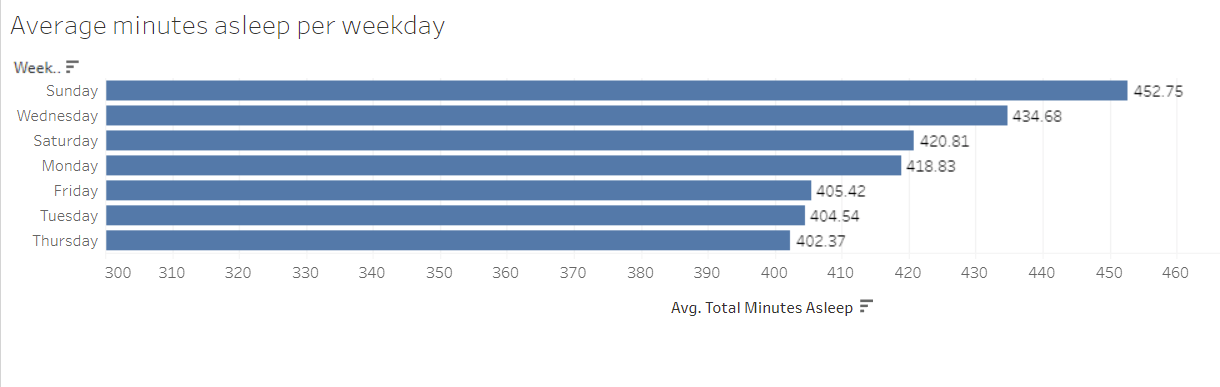

<font size="4">We notice from this graph that users tend to sleep more on sundays and wednesdays, and less on Friday, Tuesday and Thrusdays</font>

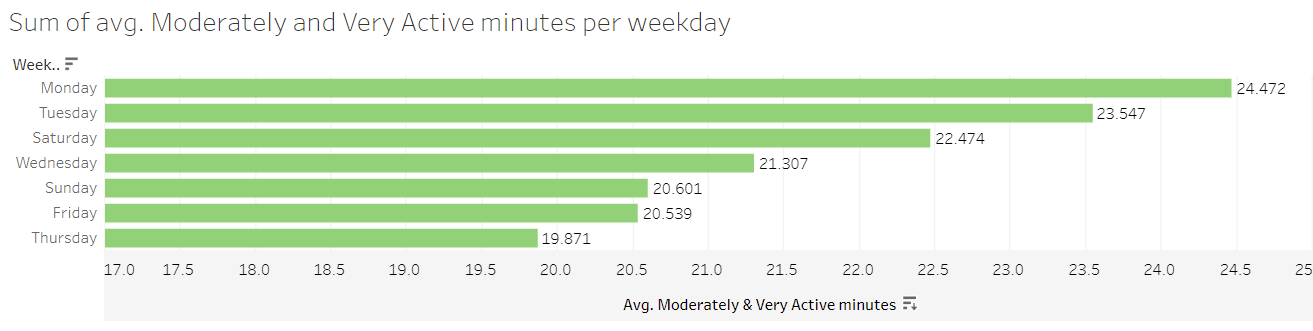

<font size="4">From this graph, we can see that FitBit users exercise more on Mondays, Tuesdays and Saturdays. Thursday is the day of the week that users spent less time with moderate or very active minutes.</font>

## Conclusion & next steps

### Insights summary & Recomendations

- Seeing that users spent on average 42.5 minutes in bed not sleeping, Bellabeat could help users with tips on how to get better sleep quality (Meditation, Yoga, a better sleep schedule, eating healthier food and exercising)
- There's a small negative correlation between sedentary time and sleep time, which could mean that people sacrifice sleep due to sedentary activies(netflix, gaming, working), or that people that spend more time in sedentary activies tend to sleep less. Bellabeat could notificate users that are past their usual bed time or not having enough sleep to help them improve their health. We would need more data to make a more detailed analysis.
- Users tend to sleep more on sundays and wednesdays, and less on Friday, Tuesday and Thrusdays. 
- Users exercise more on Mondays, Tuesdays and Saturdays. Thursday is the day of the week that users spent less time with moderate or very active minutes. Bellabeat could notify users on Thursdays & Sundays to remind them of exercising. 
- Due to the small dataset, these are the most noticeable trends & correlations we have at the moment.